In [1]:
import datetime
print("Current Date/Time: ", datetime.datetime.now())

Current Date/Time:  2020-09-26 14:19:31.542637


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Loading UD modules

In [3]:
from __future__ import print_function
import torch
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary
from tqdm import tqdm
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import os 
import numpy as np

# CUSTOM LIBRARY
import model_utility.data_utils as dutils
import model_utility.model_utils as mutils
import model_utility.plot_utils as putils 
import model_utility.regularization as regularization
import model_utility.alb_utils as alb
import sys
sys.path.append('/home/abhinav/Documents/EVA5/session9/model_utility/gradcam')
import model_utility.grad_cam_viz as viz
import model_file.QuizDNN as Q9

# PLOTS
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import data_augmentation.albumentations as A
from data_augmentation.albumentations.pytorch import ToTensor

# Check GPU avaiability

In [6]:
device = dutils.get_device()

CUDA Available? True
Device is cuda:0


In [7]:
cuda = torch.cuda.is_available()
print(cuda)

True


# CIFAR10 Basics

In [11]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=64

# CUDA?
if device.type == 'cuda':
    torch.cuda.manual_seed(SEED)
else:
    torch.manual_seed(SEED)
    
path = os.getcwd()
path

'/home/abhinav/Documents/EVA5/session9'

In [12]:
batch_size = 256

In [13]:
# load CIFAR10 dataset
trainset, testset, train_loader, test_loader = alb.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path)

Running over Cuda !!  True
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254
Files already downloaded and verified
Files already downloaded and verified


# Data mage Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

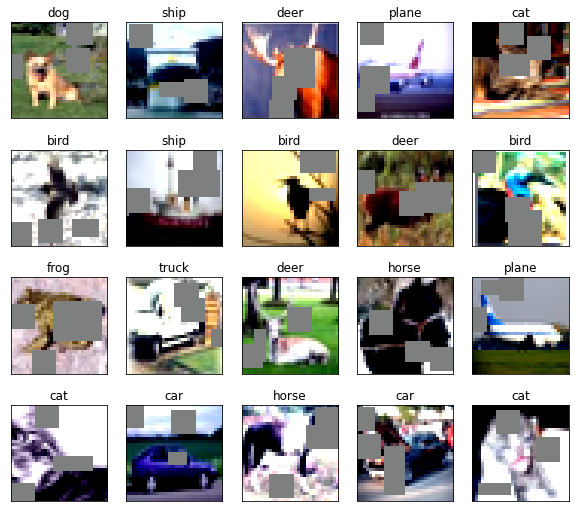

In [14]:
#Plot 20 random images
putils.plot_dataset_images(device, classes, train_loader)

### Model stracture

In [15]:
model = Q9.QuizDNN(0.10)

In [16]:
mutils.model_summary(model, device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]              96
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 64,

# Build and train model

In [17]:
from tqdm import tqdm

In [18]:
# build and train the model
model_name = "Model CIFAR10"
EPOCHS = 40
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = mutils.build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=False,
                                                            L2_penalty_val=0.00)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 2.086683, Accuracy: 3571/10000 (35.71%)

EPOCH: 1


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.243268, Accuracy: 5452/10000 (54.52%)

EPOCH: 2


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.084624, Accuracy: 6189/10000 (61.89%)

EPOCH: 3


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.109608, Accuracy: 6148/10000 (61.48%)

EPOCH: 4


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.032781, Accuracy: 6431/10000 (64.31%)

EPOCH: 5


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.957141, Accuracy: 6715/10000 (67.15%)

EPOCH: 6


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.781841, Accuracy: 7244/10000 (72.44%)

EPOCH: 7


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.976539, Accuracy: 6705/10000 (67.05%)

EPOCH: 8


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.915406, Accuracy: 6919/10000 (69.19%)

EPOCH: 9


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.727289, Accuracy: 7462/10000 (74.62%)

EPOCH: 10


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.777988, Accuracy: 7218/10000 (72.18%)

EPOCH: 11


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.769944, Accuracy: 7309/10000 (73.09%)

EPOCH: 12


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.710278, Accuracy: 7571/10000 (75.71%)

EPOCH: 13


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.662324, Accuracy: 7693/10000 (76.93%)

EPOCH: 14


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.701749, Accuracy: 7559/10000 (75.59%)

EPOCH: 15


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.606690, Accuracy: 7892/10000 (78.92%)

EPOCH: 16


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.766614, Accuracy: 7482/10000 (74.82%)

EPOCH: 17


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.587099, Accuracy: 7967/10000 (79.67%)

EPOCH: 18


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.617452, Accuracy: 7928/10000 (79.28%)

EPOCH: 19


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.622955, Accuracy: 7947/10000 (79.47%)

EPOCH: 20


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.575573, Accuracy: 7970/10000 (79.70%)

EPOCH: 21


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.577653, Accuracy: 8075/10000 (80.75%)

EPOCH: 22


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.558160, Accuracy: 8087/10000 (80.87%)

EPOCH: 23


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.534956, Accuracy: 8168/10000 (81.68%)

EPOCH: 24


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.566004, Accuracy: 8023/10000 (80.23%)

EPOCH: 25


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.605275, Accuracy: 7924/10000 (79.24%)

EPOCH: 26


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.523044, Accuracy: 8194/10000 (81.94%)

EPOCH: 27


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.574456, Accuracy: 8107/10000 (81.07%)

EPOCH: 28


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.554493, Accuracy: 8120/10000 (81.20%)

EPOCH: 29


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.529676, Accuracy: 8174/10000 (81.74%)

EPOCH: 30


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.536904, Accuracy: 8184/10000 (81.84%)

EPOCH: 31


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.536301, Accuracy: 8217/10000 (82.17%)

EPOCH: 32


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.516509, Accuracy: 8229/10000 (82.29%)

EPOCH: 33


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.513841, Accuracy: 8260/10000 (82.60%)

EPOCH: 34


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.508809, Accuracy: 8280/10000 (82.80%)

EPOCH: 35


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.526394, Accuracy: 8205/10000 (82.05%)

EPOCH: 36


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.572136, Accuracy: 8117/10000 (81.17%)

EPOCH: 37


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.528986, Accuracy: 8291/10000 (82.91%)

EPOCH: 38


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.475452, Accuracy: 8397/10000 (83.97%)

EPOCH: 39


Loss=0.400380 Batch_id=195 Accuracy=85.69: 100%|██████████| 196/196 [00:12<00:00, 15.99it/s]



Test set: Average loss: 0.580258, Accuracy: 8110/10000 (81.10%)



In [20]:
mutils.get_test_accuracy(model, device, test_loader)


Accuracy of the network on the 10000 test images: 81.10%



In [21]:
mutils.class_based_accuracy(model, device, classes, test_loader)

Accuracy of plane : 86 %
Accuracy of   car : 93 %
Accuracy of  bird : 78 %
Accuracy of   cat : 53 %
Accuracy of  deer : 68 %
Accuracy of   dog : 78 %
Accuracy of  frog : 94 %
Accuracy of horse : 93 %
Accuracy of  ship : 89 %
Accuracy of truck : 90 %



Ploting Accuracy and Loss history: Model CIFAR10



/home/abhinav/Documents/EVA5/session9/model_utility/plot_utils.py:27: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,x_size+1),x_size/10)
/home/abhinav/Documents/EVA5/session9/model_utility/plot_utils.py:38: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,x_size+1),x_size/10)


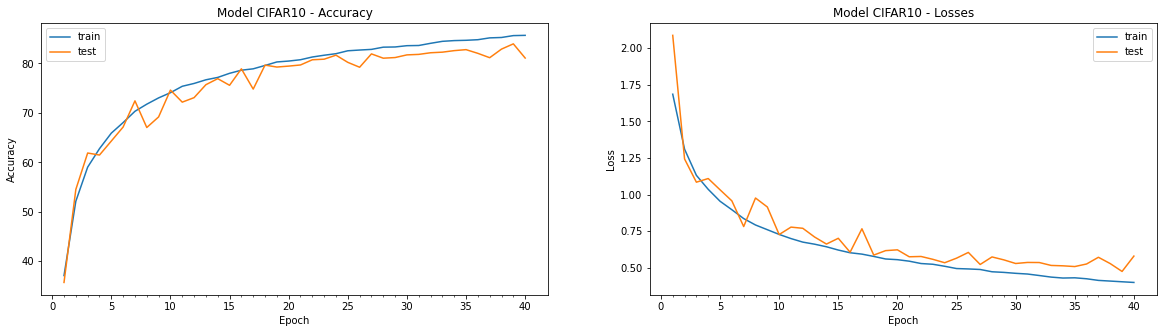

In [22]:
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
putils.plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")